# ResNet Model Building

## Fetching the Datasets

In [ ]:
# !kaggle datasets download -d paramaggarwal/fashion-product-images-small
# !unzip fashion-product-images-small.zip

## Model Building

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
# use resnet50 for feature extraction
model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
model.trainable = False

model = tf.keras.Sequential([model, GlobalMaxPooling2D()])
model.build(input_shape=(None, 224, 224, 3))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [3]:
# export the model
model.save("resnet50.keras")

### Trying out for One Image

In [4]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

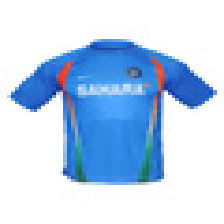

In [6]:
# load image
img_path = './data/images/1163.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img

In [7]:
img_array = image.img_to_array(img)
img_array.shape # (224, 224, 3) -> 3D array
img_array

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [8]:
expanded_img_array = np.expand_dims(img_array, axis=0)
expanded_img_array.shape # (1, 224, 224, 3) -> 4D array
expanded_img_array

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [9]:
preprocessed_img = preprocess_input(expanded_img_array)
preprocessed_img.shape # (1, 224, 224, 3) -> 4D array
preprocessed_img

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [10]:
# model.predict(preprocessed_img)
model.predict(preprocessed_img).shape # (1, 2048) -> 2D array
# model.predict(preprocessed_img).flatten().shape # (2048,) -> 1D array

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(1, 2048)

In [11]:
# calculate the norm of the output
# np.sqrt(np.dot((model.predict(preprocessed_img).flatten() ** 2))

norm(model.predict(preprocessed_img).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


332.43524

In [12]:
model.predict(preprocessed_img).flatten() / norm(model.predict(preprocessed_img).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


array([0.00491865, 0.05812976, 0.00543876, ..., 0.00351521, 0.05245368,
       0.03639518], dtype=float32)

In [13]:
!jupyter nbextension enable --py widgetsnbextension

### Extracting Features of All Images

In [14]:
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    res = model.predict(preprocessed_img, verbose=0).flatten()
    return res / norm(res) # L2 Normalization

In [15]:
from tqdm import tqdm

In [16]:
feature_list = []
image_paths = []

In [17]:
import os

# find all images in the folder ./data/images
image_folder = "./data/images"
image_files = os.listdir(image_folder)

In [18]:
for id in tqdm(image_files):
    # find id from i
    # id = df_mini.iloc[i]['id']
    image_path = f"./data/images/{id}"
    # print(image_path)
    features = extract_features(image_path)
    feature_list.append(features)
    image_paths.append(image_path)

In [ ]:
features = np.array(feature_list)
features.shape

In [ ]:
image_paths = np.array(image_paths)
image_paths.shape

In [19]:
import pickle

In [18]:
# export features and image paths to a binary file
with open("resnet50_features.pkl", "wb") as f:
    pickle.dump(feature_list, f)

with open("resnet50images.pkl", "wb") as f:
    pickle.dump(image_paths, f)